In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import pynbody


In [ ]:

os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/Merians_test.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/MerianCDM'
import merger_properties
#this locks the database, so kill the kernel to unlock
import tangos
#once  tangos is loaded force a reload
import importlib
importlib.reload(tangos)
importlib.reload(merger_properties)
from merger_properties import SmoothAxisRatio
#print names of SmoothAxisRatio functions

tangos.all_simulations()
r615 = tangos.get_simulation('r615.romulus25.3072g1HsbBH')
r761 = tangos.get_simulation('r761.romulus25.3072g1HsbBH')
r613 = tangos.get_simulation('r613.romulus25.3072g1HsbBH')
r918 = tangos.get_simulation('r918.romulus25.3072g1HsbBH')
r431 = tangos.get_simulation('r431.romulus25.3072g1HsbBH')

In [3]:

import tangos_merger_plot as tmp




In [6]:
sims = [r615, r761, r613, r918]
merger_halos = [1,1,1,1]
#sims = [r918]
trees = []
main_lines = []

for sim in sims:
    #get simulation name from sim object
    sim_name = str(sim.basename)
    print(sim_name)
    #strip everything excpt for something like r615
    sim_name = sim_name.split('.')[0]

    print(f"Building merger tree for {sim}")
    figure_folder = f'../../Figures/mergers/{sim_name}'
    if not os.path.exists(figure_folder):
        os.makedirs(figure_folder)

    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)
    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)

    # Check if any node in the main line is a merger
    merger_found = any(node.is_merger for node in main_line)
    #remove last node from main_line
    main_line = main_line[:-1]
    if merger_found:
        #plot_ba_ca_smoothed(main_line, figure_folder, sim_name)
        #plot_ba_ca(main_line, figure_folder, sim_name)
        trees.append(tree)
        main_lines.append(main_line)



r615.romulus25.3072g1HsbBH
Building merger tree for <Simulation("r615.romulus25.3072g1HsbBH")>
r761.romulus25.3072g1HsbBH
Building merger tree for <Simulation("r761.romulus25.3072g1HsbBH")>
r613.romulus25.3072g1HsbBH
Building merger tree for <Simulation("r613.romulus25.3072g1HsbBH")>
r918.romulus25.3072g1HsbBH
Building merger tree for <Simulation("r918.romulus25.3072g1HsbBH")>


In [7]:
#save 
tmp.save_picklable_data(main_lines)


Saved combined data to picklable_main_lines.pkl


In [4]:
import os
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/BWMDC_test.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/BWMDC'
import merger_properties
#this locks the database, so kill the kernel to unlock
import tangos
#once  tangos is loaded force a reload
import importlib
importlib.reload(tangos)
importlib.reload(merger_properties)
import tangos_merger_plot as tmp
from merger_properties import SmoothAxisRatio
#print names of SmoothAxisRatio functions

tangos.all_simulations()
elektra = tangos.get_simulation('elektra.cosmo25cmb.4096g5HbwK1BH')

halo = elektra.timesteps[-1].halos[2]
print(halo)
#plt.plot(halo['rbins'], halo.calculate('ba_s_smoothed()'), label='Stellar B/A')
print(halo['reff'])
print(elektra)

storm = tangos.get_simulation('storm.cosmo25cmb.4096g5HbwK1BH')
halo = storm.timesteps[-4].halos[3]
#print(halo)
#print(halo['Mvir'])

rogue = tangos.get_simulation('rogue.cosmo25cmb.4096g5HbwK1BH')
halo = rogue.timesteps[-4].halos[0]
#print(halo)
#print(halo['Mvir'])
# sims = ['h148.cosmo50PLK.3072g3HbwK1BH','h148.cosmo50PLK.3072g3HbwK1BH', 'h329.cosmo50PLK.3072gst5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH' ,'storm.cosmo25cmb.4096g5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH', 'cptmarvel.cosmo25cmb.4096g5HbwK1BH']
# merger_halos = [2,11 ,7 ,2,6,7, 7]
import numpy as np
sim_names = ['elektra.cosmo25cmb.4096g5HbwK1BH', 'storm.cosmo25cmb.4096g5HbwK1BH', 'rogue.cosmo25cmb.4096g5HbwK1BH']
sims = [tangos.get_simulation(sim) for sim in sim_names]


merger_halos = [2,3,0]
# try:
#     main_lines = pickle.load(open('main_lines.pkl', 'rb'))
#     trees = pickle.load(open('trees.pkl', 'rb'))
# except:
#     print('No existing pickle files found')

main_lines = []
trees = []
NaN = np.nan
merger_ratios = {2: [0.178100,0.102379,None] , 3: [0.226337,0.141545,None], 0: [None,0.019733,None]}


for sim in sims:
    #get simulation name from sim object
    print(sim)
    sim_name = str(sim.basename)
    print(sim_name)
    #strip everything excpt for something like r615
    sim_name = sim_name.split('.')[0]

    print(f"Building merger tree for {sim}")
    figure_folder = f'../../Figures/mergers/{sim_name}'
    if not os.path.exists(figure_folder):
        os.makedirs(figure_folder)

    halo = sim.timesteps[-1].halos[merger_halos[sims.index(sim)]]
    tree, main_line = tmp.build_merger_tree(halo, max_depth=4)

    #compare merger_ratios with values in main_line
    halo_ratios = merger_ratios[merger_halos[sims.index(sim)]]
    for i, node in enumerate(main_line):
        if i == 3:
            break
        if halo_ratios[i] is not None:
            expected_ratio = 1/halo_ratios[i]
        else:
            expected_ratio = None
        #node_merger = node.merger_ratio
        #print(f'Expected: {expected_ratio}, Actual: {node_merger}')
        #update merger ratio
        if halo_ratios[i] is not None:
            main_line[i].merger_ratio = expected_ratio
            main_line[i].is_merger = True
            main_line[i].merger_time = main_line[i].halo.timestep.time_gyr

    main_line = main_line[:-1]
    #print_merger_tree(tree)
    #plot_ba_ca_smoothed(main_line, figure_folder, sim_name)
    #plot_ba_ca(main_line, figure_folder, sim_name)
    
    trees.append(tree)
    main_lines.append(main_line)
    



#save to pickle, try and open existing pickle frist to avoid overwriting


<Halo 'elektra.cosmo25cmb.4096g5HbwK1BH/elektra.cosmo25cmb.4096g5HbwK1BH.004096/elektra.cosmo25cmb.4096g5HbwK1BH.004096/halo_3' | NDM=3432292 Nstar=156277 Ngas=1156574>
1.0999458163550528
<Simulation("elektra.cosmo25cmb.4096g5HbwK1BH")>
<Simulation("elektra.cosmo25cmb.4096g5HbwK1BH")>
elektra.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("elektra.cosmo25cmb.4096g5HbwK1BH")>
<Simulation("storm.cosmo25cmb.4096g5HbwK1BH")>
storm.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("storm.cosmo25cmb.4096g5HbwK1BH")>
<Simulation("rogue.cosmo25cmb.4096g5HbwK1BH")>
rogue.cosmo25cmb.4096g5HbwK1BH
Building merger tree for <Simulation("rogue.cosmo25cmb.4096g5HbwK1BH")>


In [5]:

# Usage in your main code:
# After generating your main_lines:
tmp.save_picklable_data(main_lines)



Loaded existing data from picklable_main_lines.pkl
Saved combined data to picklable_main_lines.pkl


In [60]:
# When you want to load and use the data later:
picklable_data = tmp.load_picklable_data()
reconstructed_main_lines = tmp.reconstruct_main_lines(picklable_data)


In [69]:
for main_line in reconstructed_main_lines:
    for node in main_line:
        print(np.log10(node.mstar), node.merger_ratio,node.halo_number)


9.473264284534949 nan 2
9.372287235118833 None 2
9.33421625332193 None 2
7.598859239559366 5.614823133071308 3
7.5907048243102775 9.767628126861954 3
7.575915281656774 None 3
7.777155223753273 4.418190574232229 4
7.776464321903526 7.064891024055954 4
7.772580508145098 None 4
9.21517157626922 None 1
9.20682528283013 nan 1
9.18699858460347 None 1


[[<tangos_merger_plot.SimpleHaloNode object at 0x7f3722320470>, <tangos_merger_plot.SimpleHaloNode object at 0x7f372202a960>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3722030530>], [<tangos_merger_plot.SimpleHaloNode object at 0x7f3721f56f00>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f56e10>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f57050>], [<tangos_merger_plot.SimpleHaloNode object at 0x7f3721f57080>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f56ff0>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f56b40>], [<tangos_merger_plot.SimpleHaloNode object at 0x7f3721f570b0>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f57110>, <tangos_merger_plot.SimpleHaloNode object at 0x7f3721f56f90>]]
at timestep 13.800513767674692 Gyr, merger ratio is nan
at timestep 13.731118532447283 Gyr, merger ratio is 5.614823133071308
at timestep 13.516741748586895 Gyr, merger ratio is 9.767628126861954
at timestep 13.731118532488576 Gyr, merger ratio is

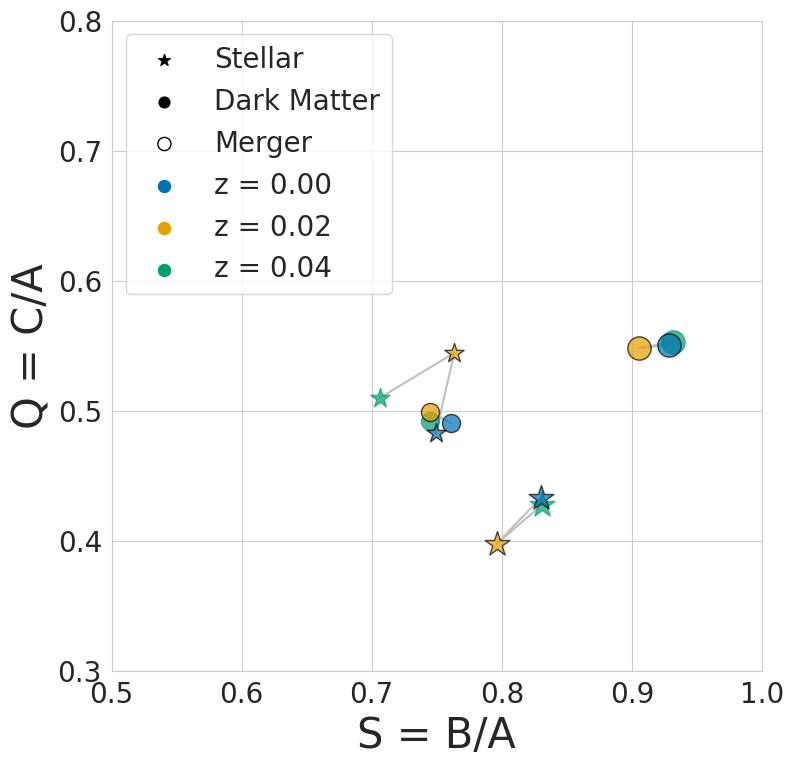

In [82]:

# Usage
#main_lines = load_halo_nodes('main_lines.pkl')
#reload tangos_merger_plot.py
import importlib
importlib.reload(tmp)



print(reconstructed_main_lines)
#remove merger ratios greater than 10
for main_line in reconstructed_main_lines:
    for node in main_line:
        if node.merger_ratio != np.nan and node.merger_ratio != None:
            #print(node.merger_ratio)
            #print(node.merger_time)
            
            print(f'at timestep {node.merger_time} Gyr, merger ratio is {node.merger_ratio}')
            if node.merger_ratio > 10:
                node.merger_ratio = np.nan
                node.is_merger = False

tmp.plot_merger_ba_ca(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_dm_to_stellar=False, link_timesteps=True)

# tmp.plot_merger_ba_ca(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_dm_to_stellar=True, link_timesteps=False)

#tmp.plot_Mstar_vs_T(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_timesteps=True)

No merger found for simulation 0
No merger found for simulation 3


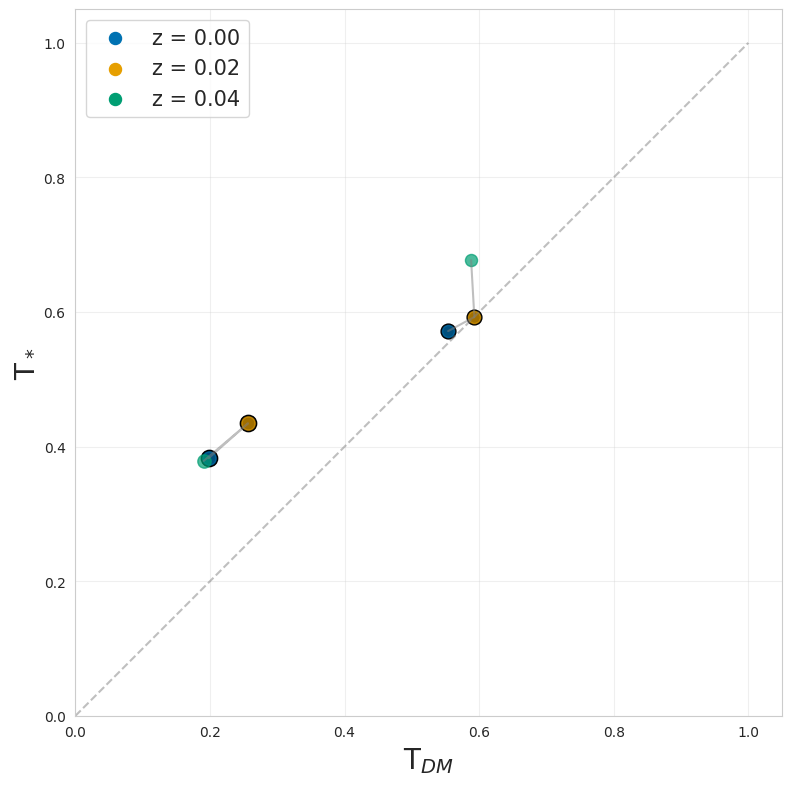

In [79]:
import importlib
importlib.reload(tmp)

tmp.plot_merger_T_d_vs_T_s(reconstructed_main_lines, '/home/bk639/OverLeaf/ShapePaper/figures/', link_timesteps=True)

In [9]:
#print merger ratios with halo numbers and simulation names
for main_line in reconstructed_main_lines:
    for node in main_line:
        print(np.log10(node.mstar), node.merger_ratio,node.halo_number, node.sim_name)

AttributeError: 'SimpleHaloNode' object has no attribute 'sim_name'